In [122]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn-v0_8-colorblind')

# Set Variables

In [123]:
n = 2
a = 4
b = 4
alpha = 0.05

# Nulhypotheses

- Temperatuur

H0: $$\tau_1 = \tau_2 = 0$$
H1: $$\tau_i \neq 0  \text{ voor tenminste één } \tau$$

- Koper concentratie

H0: $$\beta_1 = \beta_2 = 0$$
H1: $$\beta_i \neq 0  \text{ voor tenminste één } \beta$$

- Combinatie

H0: $$(\tau\beta)_{11} = (\tau\beta)_{12} = ... = (\tau\beta)_{ij} = 0$$
H1: $$(\tau\beta)_{ij} \neq 0 \text{ voor tenminste één } \tau\beta$$

# Lees excel tabel en vul dataframe

aangevuld met:

- gemiddelde temperatuur
- gemiddelde coperconcentratie

In [124]:
Data = pd.read_excel("opdrachten14.xlsx", sheet_name="14.6")

In [125]:
A_names = Data["Temp"].unique().tolist()

In [126]:
B_names = Data["Copper"].unique().tolist()

In [127]:
mean_A = []

for name in A_names:
    mean = Data["value"][Data["Temp"]==name].mean()
    mean_A.append(mean)

In [128]:
mean_B =[]

for name in B_names:
    mean = Data["value"][Data["Copper"]==name].mean()
    mean_B.append(mean)

In [129]:
Data["mean_Temp"] = np.nan

In [130]:
for i in range(len(A_names)):
    Data["mean_Temp"][Data["Temp"] == A_names[i]] = mean_A[i]

Data["mean_Copper"] = np.repeat(mean_B, n*a)

/tmp/ipykernel_108483/278934350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["mean_Temp"][Data["Temp"] == A_names[i]] = mean_A[i]


In [151]:
Data

,Temp,Copper,value,mean_Temp,mean_Copper,residuals
0,50,40,17,21.875,15.500,-1.5
1,50,40,20,21.875,15.500,1.5
2,75,40,12,17.375,15.500,1.5
3,75,40,9,17.375,15.500,-1.5
4,100,40,16,21.000,15.500,2.0
5,100,40,12,21.000,15.500,-2.0
6,125,40,21,23.375,15.500,2.0
7,125,40,17,23.375,15.500,-2.0
8,50,60,16,21.875,18.875,-2.5
9,50,60,21,21.875,18.875,2.5


# Model maken

Dataframe aanvullen met

- residuals

In [131]:
formula = 'value ~ C(Temp) + C(Copper) + C(Temp):C(Copper)'
model = ols(formula, Data).fit()

Data["residuals"] = model.resid

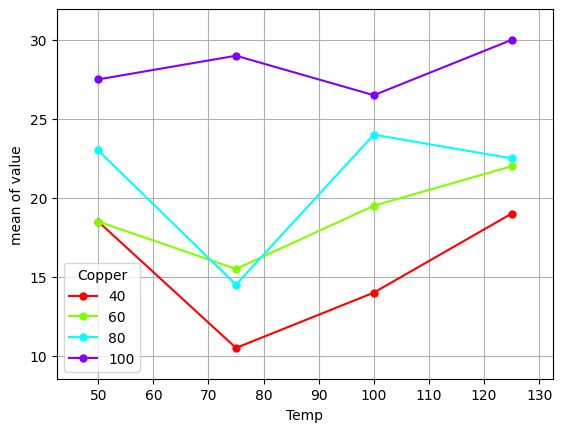

In [132]:
fig = interaction_plot(Data.Temp, Data.Copper, Data.value, ms=10)
plt.grid(True)

# Anova Table

In [133]:
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Temp),156.09375,3.0,7.672811,2.126631e-03
C(Copper),698.34375,3.0,34.327189,3.349763e-07
C(Temp):C(Copper),113.78125,9.0,1.864311,1.327481e-01
Residual,108.50000,16.0,NaN,NaN


# A

Uit de ANOVA tabel is af te lezen:
- $p_{temp} < \alpha$ -> nulhypothese wordt verworpen
    - Er is een significante invloed van de temperatuur op de hoeveelheid warping.
- $p_{koper} < \alpha$ -> nulhypothese wordt verworpen
    - Er is een significante invloed van de koperconcentratie op de hoeveelheid warping.
- $p_{combi} > \alpha$ -> nulhypothese wordt geaccepteerd
    - Er is geen interactie tussen de termen.

Laatste stelling is nogal vreemd aangezien de interactie plot een duidelijk snijpunt tussen een koper concentratie van 60 en 80 weergeeft.

# MSE berekenen

In [134]:
ss = anova_table["sum_sq"].tolist()
df = anova_table['df'].tolist()

mse = [ss[i]/df[i] for i in range(len(ss))]
mse

[52.031250000000085, 232.78125000000034, 12.642361111111128, 6.78125]

# Normal probability plot maken

In [138]:
res = Data['residuals'].values.tolist()
res.sort()
res = np.round(res, 4)

In [139]:
ind= [1]
for i in range(1, len(res)):
    if res[i] == res[i-1]:
        ind.append(ind[i-1])
    else:
        ind.append(i+1)

In [140]:
kans = [(i-0.5)/len(res) for i in ind]
z = stats.norm.ppf(kans)
res = np.transpose(res)
res = res[:,np.newaxis]
az = np.linalg.lstsq(res, z,rcond=None)

In [141]:
stats.norm.ppf(kans)

array([-2.15387469, -1.67593972, -1.67593972, -1.67593972, -1.07751557,
       -1.07751557, -1.07751557, -0.72451438, -0.72451438, -0.72451438,
       -0.44509652, -0.44509652, -0.44509652, -0.44509652, -0.11776987,
       -0.11776987,  0.03917609,  0.03917609,  0.19709908,  0.19709908,
        0.19709908,  0.19709908,  0.53340971,  0.53340971,  0.53340971,
        0.83051088,  0.83051088,  0.83051088,  1.22985876,  1.22985876,
        1.22985876,  2.15387469])

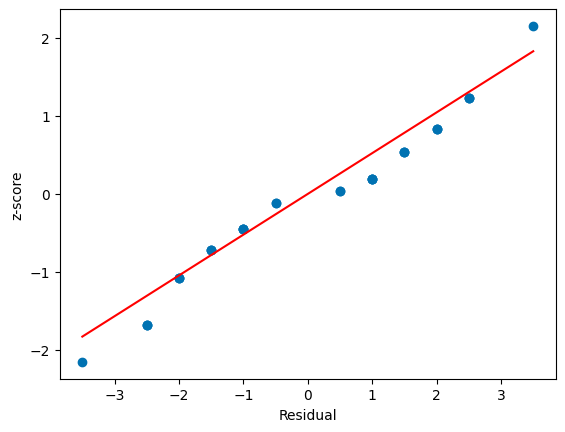

In [142]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(res, az[0]*res, 'r')
ax1.scatter(res, z)
ax1.set_ylabel('z-score')
ax1.set_xlabel('Residual')
plt.show()


# Residuals plots

<StemContainer object of 3 artists>

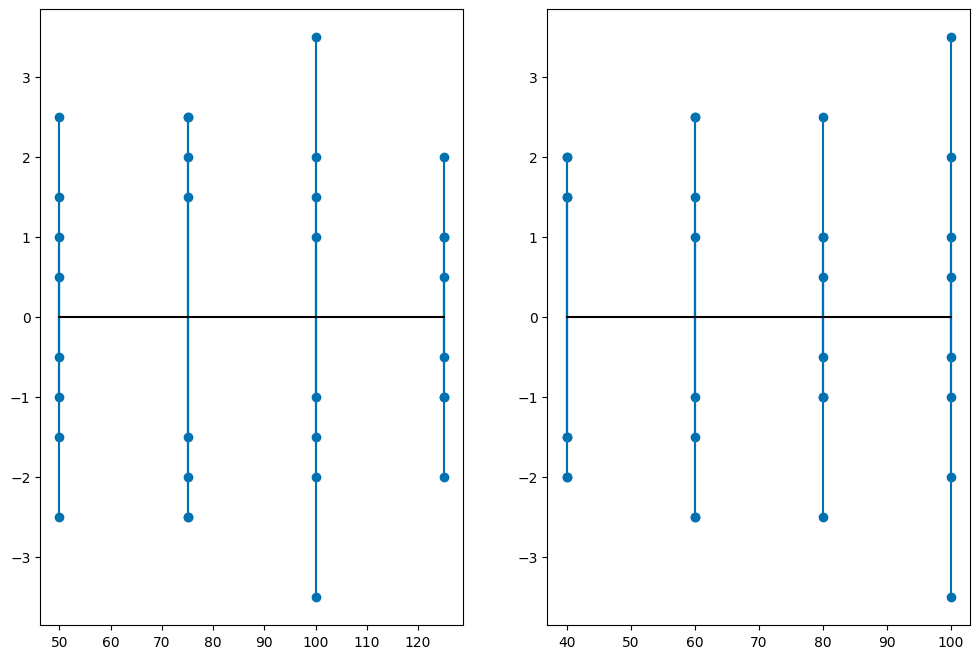

In [143]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

ax1.stem(Data.Temp.values, model.resid, basefmt='k')
ax2.stem(Data.Copper.values, model.resid, basefmt = 'k')

# Residuals tegen predicted

In [144]:
yhat = Data["value"].mean() + ( Data["mean_Temp"] + Data["mean_Copper"] - np.mean(Data["mean_Temp"] + Data["mean_Copper"]))

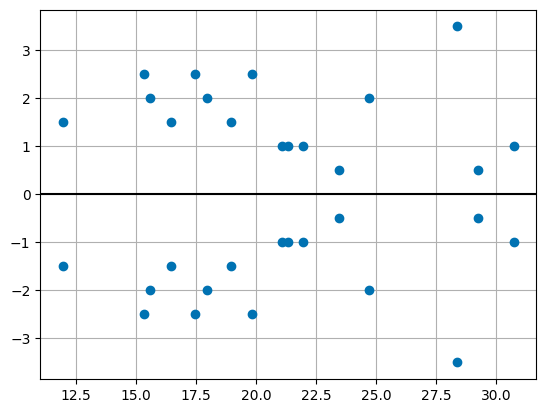

In [145]:
fig, ax = plt.subplots(1,1)
plt.grid(True)
ax.scatter(yhat, model.resid, zorder=3)
ax.axhline(y = 0, color='k')
plt.show()


# B

Uit de residual plots blijkt er totale willekeurigheid te heersen. Hieruit kan geconcludeerd worden dat er geen externe factoren van invloed zijn op het model.

# Plot averages tegen copper concentration


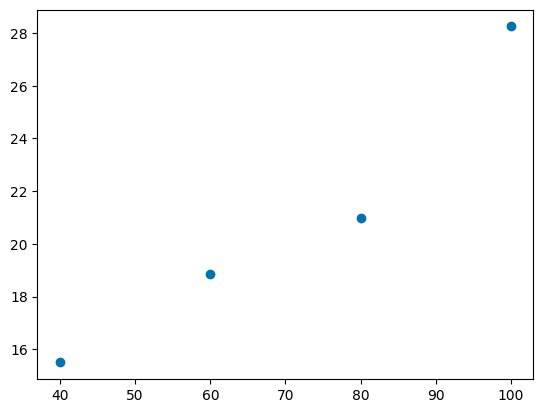

In [155]:
fig ,ax = plt.subplots(1,1)
ax.scatter(B_names, mean_B)
plt.show()

# LSD

In [160]:
t_crit = stats.t.ppf(q=1-alpha, df=df[-1])

lsd = t_crit * np.sqrt(2*mse[-1]/n)

In [172]:
diff = []

for i in range(len(mean_B) -1):
    for j in range(i+1, len(mean_B)):
        difference = np.abs(mean_B[i] - mean_B[j])
        diff.append(difference)
        if difference > lsd:
            print("%i-%i: SIGNIFICANT DIFFERENCE!" %((i+1),(j+1)))
        else:
            print("%i-%i: no significant difference " %(i+1,j+1))

1-2: no significant difference 
1-3: SIGNIFICANT DIFFERENCE!
1-4: SIGNIFICANT DIFFERENCE!
2-3: no significant difference 
2-4: SIGNIFICANT DIFFERENCE!
3-4: SIGNIFICANT DIFFERENCE!


# C

Uit de gemiddeldes blijkt, dat bij een koperconcentratie van 40% er geen een lagere wraping is t.o.v. de concentraties. Uit de LSD methode blijkt ook dat deze concentratie geen significante verschillen vertoont t.o.v. de overige concentraties. Daarom is het aanbevolen om bij een kleine wraping een koperconcentratie van 40% te gebruiken.

In [169]:
mean_B[0] - mean_B[1]

-3.375

# LSD op temperatuur

In [171]:
diff_T = []

for i in range(len(mean_A) -1):
    for j in range(i+1, len(mean_A)):
        difference = np.abs(mean_A[i] - mean_A[j])
        diff_T.append(difference)
        if difference > lsd:
            print("%i-%i: SIGNIFICANT DIFFERENCE!" %((i+1),(j+1)))
        else:
            print("%i-%i: no significant difference " %(i+1,j+1))

1-2: no significant difference 
1-3: no significant difference 
1-4: no significant difference 
2-3: no significant difference 
2-4: SIGNIFICANT DIFFERENCE!
3-4: no significant difference 


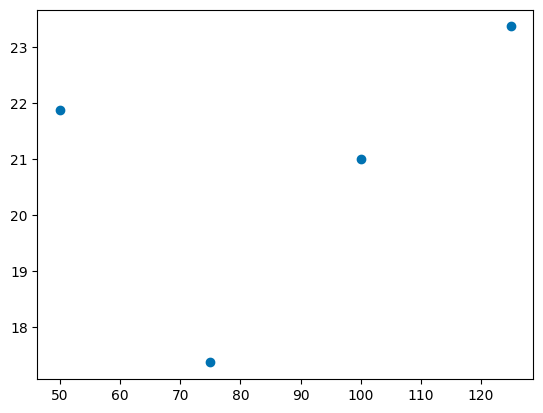

In [173]:
fig, ax = plt.subplots(1,1)
ax.scatter(A_names, mean_A)

# D

De LSD op de temperatuur wijst uit, dat er geen significante verschillen bestaat tussen de treatments. Behalve een temperatuur van 75 t.o.v. 125. Het is dus van belang dat om een zo laag mogelijke wraping te creeëren, de temperatuur niet rond de 75 graden Celsius is. Bij deze temperatuur dient een ander optimum te worden gevonden.